# BUSINESS UNDERSTANDING
- **TOPIK: KTT G20**

- **Alasan memilih topik tersebut: Ingin mengetahui seberapa antusiasme rakyat Indonesia untuk menyambut KTT G20 di Bali**

# DATA UNDERSTANDING

### 1. **Data Collection**

In [2]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import json, tweepy, requests, re,string
from requests_oauthlib import OAuth1
from tweepy import OAuthHandler
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import nltk
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from urllib.request import urlopen
from bs4 import BeautifulSoup

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\man0l\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
with open("token.json")as f:
  tokens = json.load(f)

bearer_token = tokens['bearer_token']
api_key = tokens['api_key']
api_key_secret = tokens['api_key_secret']
access_token = tokens['access_token']
access_token_secret = tokens['access_token_secret']
tokens.keys()

dict_keys(['bearer_token', 'api_key', 'api_key_secret', 'access_token', 'access_token_secret'])

In [4]:
auth = tweepy.OAuthHandler(api_key,api_key_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth,wait_on_rate_limit=True)


In [5]:
username= "G20"
max_result=19
posts=tweepy.Cursor(api.search_tweets,q=username,lang='id',tweet_mode='extended',).items(max_result)

In [6]:
df=pd.DataFrame([tweet.full_text for tweet in posts],columns=['Tweets'])
df.head(19)

,Tweets
0,@BradHarizz @EdoedPohan @aniesbaswedan @ganjar...
1,RT @YulieNew: Diundangnya pak Anies di acara E...
2,RT @BosPurwa: Klo masih gak paham apa yg diomo...
3,RT @BosPurwa: Klo masih gak paham apa yg diomo...
4,@TanMala06960320 @aniesbaswedan @USAmbIndonesi...
5,RT @Save_Moslem: Anies Diundang Jadi Pembicara...
6,RT @Muhammad_Saewad: Ganjar Tidak Diundang di ...
7,RT @Muhammad_Saewad: Ganjar Tidak Diundang di ...
8,Pemerintah pastikan semua sektor keamanan KTT ...
9,Tarian tradisional Bali menyambut para Tamu Ne...


In [7]:
alamat="https://id.wikipedia.org/wiki/G20"
html = urlopen(alamat)
data = BeautifulSoup(html, 'html.parser')
table = data.findAll("table", {"class":"wikitable"})

In [8]:
table = data.findAll("table", {"class":"wikitable"})[0]
rows = table.findAll("tr")

In [9]:
table = data.findAll("table", {"class":"wikitable"})[0]
rows = table.findAll("tr")
for row in rows:
    for cell in row.findAll(["td", "th"]):
         print(cell.get_text())

Tahun
Ke
Tanggal
Lokasi
Pemimpin tuan rumah
Situs web

2008
I[6]
14–15 November 2008
 Washington, D.C.
George W. Bush


2009
II[6]
2 April 2009
 London
Gordon Brown
londonsummit.gov.uk Diarsipkan 2009-06-27 di Stanford Web Archive

2009

III[6]
24–25 September 2009
 Pittsburgh
Barack Obama
pittsburghsummit.gov Diarsipkan 2009-08-15 di Wayback Machine.

2010
IV[7]
26–27 Juni 2010
 Toronto
Stephen Harper
g20.gc.ca Diarsipkan 2010-06-30 di Wayback Machine.

2010

V[8]
11–12 November 2010
 Seoul
Lee Myung-bak
seoulsummit.kr

2011
VI[9]
3–4 November 2011[10]
 Cannes[11]
Nicolas Sarkozy
[2] Diarsipkan 2011-05-30 di Wayback Machine.

2012
VII[12]
18–19 Juni 2012[13]
 Los Cabos

Felipe Calderón
[3]

2013
VIII[14]
5–6 September 2013[15]
 Saint Petersburg
Vladimir Putin
[4] Diarsipkan 2013-09-21 di Wayback Machine.

2014
IX[14]
15–16 November 2014
 Brisbane
Tony Abbott


2015
X[14]
15–16 November 2015
 Antalya
Recep Tayyip Erdoğan


2016
XI[14]
4–5 September 2016
 Hangzhou
Xi Jinping


2017
XII[

In [10]:
hasil = []
for row in rows:
    info = []
    for cell in row.findAll(["td", "th"]):
        info.append(cell.get_text())
    hasil.append(info)

In [11]:
df1 = pd.DataFrame(hasil, columns =['Tahun','Ke','Tanggal', 'Lokasi','Pemimpin tuan rumah','Situs web'])
display(df1)

,Tahun,Ke,Tanggal,Lokasi,Pemimpin tuan rumah,Situs web
0,Tahun,Ke,Tanggal,Lokasi,Pemimpin tuan rumah,Situs web\n
1,2008,I[6],14–15 November 2008,"Washington, D.C.",George W. Bush,\n
2,2009,II[6],2 April 2009,London,Gordon Brown,londonsummit.gov.uk Diarsipkan 2009-06-27 di S...
3,2009\n,III[6],24–25 September 2009,Pittsburgh,Barack Obama,pittsburghsummit.gov Diarsipkan 2009-08-15 di ...
4,2010,IV[7],26–27 Juni 2010,Toronto,Stephen Harper,g20.gc.ca Diarsipkan 2010-06-30 di Wayback Mac...
5,2010\n,V[8],11–12 November 2010,Seoul,Lee Myung-bak,seoulsummit.kr\n
6,2011,VI[9],3–4 November 2011[10],Cannes[11],Nicolas Sarkozy,[2] Diarsipkan 2011-05-30 di Wayback Machine.\n
7,2012,VII[12],18–19 Juni 2012[13],Los Cabos\n,Felipe Calderón,[3]\n
8,2013,VIII[14],5–6 September 2013[15],Saint Petersburg,Vladimir Putin,[4] Diarsipkan 2013-09-21 di Wayback Machine.\n
9,2014,IX[14],15–16 November 2014,Brisbane,Tony Abbott,\n


In [12]:
df12=df1.drop(labels=[0,0], axis=0)
display(df12)

,Tahun,Ke,Tanggal,Lokasi,Pemimpin tuan rumah,Situs web
1,2008,I[6],14–15 November 2008,"Washington, D.C.",George W. Bush,\n
2,2009,II[6],2 April 2009,London,Gordon Brown,londonsummit.gov.uk Diarsipkan 2009-06-27 di S...
3,2009\n,III[6],24–25 September 2009,Pittsburgh,Barack Obama,pittsburghsummit.gov Diarsipkan 2009-08-15 di ...
4,2010,IV[7],26–27 Juni 2010,Toronto,Stephen Harper,g20.gc.ca Diarsipkan 2010-06-30 di Wayback Mac...
5,2010\n,V[8],11–12 November 2010,Seoul,Lee Myung-bak,seoulsummit.kr\n
6,2011,VI[9],3–4 November 2011[10],Cannes[11],Nicolas Sarkozy,[2] Diarsipkan 2011-05-30 di Wayback Machine.\n
7,2012,VII[12],18–19 Juni 2012[13],Los Cabos\n,Felipe Calderón,[3]\n
8,2013,VIII[14],5–6 September 2013[15],Saint Petersburg,Vladimir Putin,[4] Diarsipkan 2013-09-21 di Wayback Machine.\n
9,2014,IX[14],15–16 November 2014,Brisbane,Tony Abbott,\n
10,2015,X[14],15–16 November 2015,Antalya,Recep Tayyip Erdoğan,\n


In [13]:
df12.reset_index(drop = True, inplace = True)
display(df12)

,Tahun,Ke,Tanggal,Lokasi,Pemimpin tuan rumah,Situs web
0,2008,I[6],14–15 November 2008,"Washington, D.C.",George W. Bush,\n
1,2009,II[6],2 April 2009,London,Gordon Brown,londonsummit.gov.uk Diarsipkan 2009-06-27 di S...
2,2009\n,III[6],24–25 September 2009,Pittsburgh,Barack Obama,pittsburghsummit.gov Diarsipkan 2009-08-15 di ...
3,2010,IV[7],26–27 Juni 2010,Toronto,Stephen Harper,g20.gc.ca Diarsipkan 2010-06-30 di Wayback Mac...
4,2010\n,V[8],11–12 November 2010,Seoul,Lee Myung-bak,seoulsummit.kr\n
5,2011,VI[9],3–4 November 2011[10],Cannes[11],Nicolas Sarkozy,[2] Diarsipkan 2011-05-30 di Wayback Machine.\n
6,2012,VII[12],18–19 Juni 2012[13],Los Cabos\n,Felipe Calderón,[3]\n
7,2013,VIII[14],5–6 September 2013[15],Saint Petersburg,Vladimir Putin,[4] Diarsipkan 2013-09-21 di Wayback Machine.\n
8,2014,IX[14],15–16 November 2014,Brisbane,Tony Abbott,\n
9,2015,X[14],15–16 November 2015,Antalya,Recep Tayyip Erdoğan,\n


In [14]:
df13= df12.drop(['Ke',"Situs web"],axis=1)

In [15]:
df13

,Tahun,Tanggal,Lokasi,Pemimpin tuan rumah
0,2008,14–15 November 2008,"Washington, D.C.",George W. Bush
1,2009,2 April 2009,London,Gordon Brown
2,2009\n,24–25 September 2009,Pittsburgh,Barack Obama
3,2010,26–27 Juni 2010,Toronto,Stephen Harper
4,2010\n,11–12 November 2010,Seoul,Lee Myung-bak
5,2011,3–4 November 2011[10],Cannes[11],Nicolas Sarkozy
6,2012,18–19 Juni 2012[13],Los Cabos\n,Felipe Calderón
7,2013,5–6 September 2013[15],Saint Petersburg,Vladimir Putin
8,2014,15–16 November 2014,Brisbane,Tony Abbott
9,2015,15–16 November 2015,Antalya,Recep Tayyip Erdoğan


In [16]:
dfbaru=pd.DataFrame(df13)

In [17]:
dfbaru

,Tahun,Tanggal,Lokasi,Pemimpin tuan rumah
0,2008,14–15 November 2008,"Washington, D.C.",George W. Bush
1,2009,2 April 2009,London,Gordon Brown
2,2009\n,24–25 September 2009,Pittsburgh,Barack Obama
3,2010,26–27 Juni 2010,Toronto,Stephen Harper
4,2010\n,11–12 November 2010,Seoul,Lee Myung-bak
5,2011,3–4 November 2011[10],Cannes[11],Nicolas Sarkozy
6,2012,18–19 Juni 2012[13],Los Cabos\n,Felipe Calderón
7,2013,5–6 September 2013[15],Saint Petersburg,Vladimir Putin
8,2014,15–16 November 2014,Brisbane,Tony Abbott
9,2015,15–16 November 2015,Antalya,Recep Tayyip Erdoğan


In [18]:
df

,Tweets
0,@BradHarizz @EdoedPohan @aniesbaswedan @ganjar...
1,RT @YulieNew: Diundangnya pak Anies di acara E...
2,RT @BosPurwa: Klo masih gak paham apa yg diomo...
3,RT @BosPurwa: Klo masih gak paham apa yg diomo...
4,@TanMala06960320 @aniesbaswedan @USAmbIndonesi...
5,RT @Save_Moslem: Anies Diundang Jadi Pembicara...
6,RT @Muhammad_Saewad: Ganjar Tidak Diundang di ...
7,RT @Muhammad_Saewad: Ganjar Tidak Diundang di ...
8,Pemerintah pastikan semua sektor keamanan KTT ...
9,Tarian tradisional Bali menyambut para Tamu Ne...


In [19]:
result = pd.concat([df13, df], axis=1, join='inner')
display(result)

,Tahun,Tanggal,Lokasi,Pemimpin tuan rumah,Tweets
0,2008,14–15 November 2008,"Washington, D.C.",George W. Bush,@BradHarizz @EdoedPohan @aniesbaswedan @ganjar...
1,2009,2 April 2009,London,Gordon Brown,RT @YulieNew: Diundangnya pak Anies di acara E...
2,2009\n,24–25 September 2009,Pittsburgh,Barack Obama,RT @BosPurwa: Klo masih gak paham apa yg diomo...
3,2010,26–27 Juni 2010,Toronto,Stephen Harper,RT @BosPurwa: Klo masih gak paham apa yg diomo...
4,2010\n,11–12 November 2010,Seoul,Lee Myung-bak,@TanMala06960320 @aniesbaswedan @USAmbIndonesi...
5,2011,3–4 November 2011[10],Cannes[11],Nicolas Sarkozy,RT @Save_Moslem: Anies Diundang Jadi Pembicara...
6,2012,18–19 Juni 2012[13],Los Cabos\n,Felipe Calderón,RT @Muhammad_Saewad: Ganjar Tidak Diundang di ...
7,2013,5–6 September 2013[15],Saint Petersburg,Vladimir Putin,RT @Muhammad_Saewad: Ganjar Tidak Diundang di ...
8,2014,15–16 November 2014,Brisbane,Tony Abbott,Pemerintah pastikan semua sektor keamanan KTT ...
9,2015,15–16 November 2015,Antalya,Recep Tayyip Erdoğan,Tarian tradisional Bali menyambut para Tamu Ne...


In [20]:
result.to_csv('datagabungan.csv')

In [21]:
dfresult=pd.read_csv('datagabungan.csv')
dfresult.head()

,Unnamed: 0,Tahun,Tanggal,Lokasi,Pemimpin tuan rumah,Tweets
0,0,2008,14–15 November 2008,"Washington, D.C.",George W. Bush,@BradHarizz @EdoedPohan @aniesbaswedan @ganjar...
1,1,2009,2 April 2009,London,Gordon Brown,RT @YulieNew: Diundangnya pak Anies di acara E...
2,2,2009,24–25 September 2009,Pittsburgh,Barack Obama,RT @BosPurwa: Klo masih gak paham apa yg diomo...
3,3,2010,26–27 Juni 2010,Toronto,Stephen Harper,RT @BosPurwa: Klo masih gak paham apa yg diomo...
4,4,2010,11–12 November 2010,Seoul,Lee Myung-bak,@TanMala06960320 @aniesbaswedan @USAmbIndonesi...


### 2. **Data Processing**

In [43]:

def clean_lower(lwr):
    lwr = lwr.lower() 
    return lwr
# Buat kolom tambahan untuk data description yang telah dicasefolding  
dfresult['lwr'] = dfresult['Tweets'].apply(clean_lower)
casefolding=pd.DataFrame(dfresult['lwr'])
casefolding

#Remove Puncutuation
clean_spcl = re.compile('[/(){}\[\]\|@,-.]')
clean_symbol = re.compile('[^0-9a-z]')
def clean_punct(text):
    text = clean_spcl.sub('', text)
    text = clean_symbol.sub(' ', text)
    return text
# Buat kolom tambahan untuk data description yang telah diremovepunctuation   
dfresult['clean_punct'] = dfresult['lwr'].apply(clean_punct)
dfresult['clean_punct']

#whitespace
def _normalize_whitespace(text):
    corrected = str(text)
    corrected = re.sub(r"//t",r"\t", corrected)
    corrected = re.sub(r"( )\1+",r"\1", corrected)
    corrected = re.sub(r"(\n)\1+",r"\1", corrected)
    corrected = re.sub(r"(\r)\1+",r"\1", corrected)
    corrected = re.sub(r"(\t)\1+",r"\1", corrected)
    return corrected.strip(" ")
dfresult['clean_double_ws'] = dfresult['clean_punct'].apply(_normalize_whitespace)
dfresult['clean_double_ws']

#remove numbers
def clean_number(nmbr):
    nmbr=re.sub(r"\d+", "",nmbr)
    return nmbr
dfresult['clean_number'] = dfresult['clean_double_ws'].apply(clean_number)
dfresult['clean_number']

def case_folding2(data):
    #data = data.lower()
    data = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",data).split())
    data = re.sub(r"\d+", "", data)
    data = data.translate(str.maketrans("","",string.punctuation))
    data = re.sub(r"\n","",data)
    data = re.sub(r"\t","",data)
    data=re.sub('#','',data)
    data=re.sub('rt(RT)[\s]+','',data)
    data=re.sub('https\\:\/\/\S+','',data)
    return data
dfresult['clean_all'] = dfresult['clean_number'].apply(case_folding2)
dfresult['clean_all']

0     bradharizz edoedpohan aniesbaswedan ganjarpran...
1     rt yulienew diundangnya pak anies di acara eve...
2     rt bospurwa klo masih gak paham apa yg diomong...
3     rt bospurwa klo masih gak paham apa yg diomong...
4     tanmala aniesbaswedan usambindonesia usembassy...
5     rt save moslem anies diundang jadi pembicara d...
6     rt muhammad saewad ganjar tidak diundang di g ...
7     rt muhammad saewad ganjar tidak diundang di g ...
8     pemerintah pastikan semua sektor keamanan ktt ...
9     tarian tradisional bali menyambut para tamu ne...
10    kakanwil kemenkumham jateng a yuspahruddin lap...
11    rt aniesbaswedan merupakan sebuah kehormatan u...
12    rt larismi menlu rusia tiba di bali gantikan p...
13    rt larismi presiden amerika serikat joe biden ...
14    rt larismi presiden jokowi tiba di bali menuju...
15    yugopati aniesbaswedan usambindonesia usembass...
16    bradharizz edoedpohan aniesbaswedan ganjarpran...
17    sakitotak santorinissun jelas hadir beliau

In [44]:
display(dfresult)

,Unnamed: 0,Tahun,Tanggal,Lokasi,Pemimpin tuan rumah,Tweets,lwr,clean_punct,clean_double_ws,clean_number,clean_all,clean_sw,add_swr,desc_clean_porterstem
0,0,2008,14–15 November 2008,"Washington, D.C.",George W. Bush,@BradHarizz @EdoedPohan @aniesbaswedan @ganjar...,@bradharizz @edoedpohan @aniesbaswedan @ganjar...,bradharizz edoedpohan aniesbaswedan ganjarpran...,bradharizz edoedpohan aniesbaswedan ganjarpran...,bradharizz edoedpohan aniesbaswedan ganjarpran...,bradharizz edoedpohan aniesbaswedan ganjarpran...,bradharizz edoedpohan aniesbaswedan ganjarpran...,bradharizz edoedpohan aniesbaswedan ganjarpran...,bradharizz edoedpohan aniesbaswedan ganjarpran...
1,1,2009,2 April 2009,London,Gordon Brown,RT @YulieNew: Diundangnya pak Anies di acara E...,rt @yulienew: diundangnya pak anies di acara e...,rt yulienew diundangnya pak anies di acara ev...,rt yulienew diundangnya pak anies di acara eve...,rt yulienew diundangnya pak anies di acara eve...,rt yulienew diundangnya pak anies di acara eve...,rt yulienew diundangnya anies acara event g bu...,rt yulienew diundangnya anies acara event g bu...,rt yulienew diundangnya ani acara event g bukt...
2,2,2009,24–25 September 2009,Pittsburgh,Barack Obama,RT @BosPurwa: Klo masih gak paham apa yg diomo...,rt @bospurwa: klo masih gak paham apa yg diomo...,rt bospurwa klo masih gak paham apa yg diomon...,rt bospurwa klo masih gak paham apa yg diomong...,rt bospurwa klo masih gak paham apa yg diomong...,rt bospurwa klo masih gak paham apa yg diomong...,rt bospurwa klo gak paham yg diomongin anies l...,rt bospurwa klo gak paham yg diomongin anies l...,rt bospurwa klo gak paham yg diomongin ani loe...
3,3,2010,26–27 Juni 2010,Toronto,Stephen Harper,RT @BosPurwa: Klo masih gak paham apa yg diomo...,rt @bospurwa: klo masih gak paham apa yg diomo...,rt bospurwa klo masih gak paham apa yg diomon...,rt bospurwa klo masih gak paham apa yg diomong...,rt bospurwa klo masih gak paham apa yg diomong...,rt bospurwa klo masih gak paham apa yg diomong...,rt bospurwa klo gak paham yg diomongin anies l...,rt bospurwa klo gak paham yg diomongin anies l...,rt bospurwa klo gak paham yg diomongin ani loe...
4,4,2010,11–12 November 2010,Seoul,Lee Myung-bak,@TanMala06960320 @aniesbaswedan @USAmbIndonesi...,@tanmala06960320 @aniesbaswedan @usambindonesi...,tanmala06960320 aniesbaswedan usambindonesia u...,tanmala06960320 aniesbaswedan usambindonesia u...,tanmala aniesbaswedan usambindonesia usembassy...,tanmala aniesbaswedan usambindonesia usembassy...,tanmala aniesbaswedan usambindonesia usembassy...,tanmala aniesbaswedan usambindonesia usembassy...,tanmala aniesbaswedan usambindonesia usembassy...
5,5,2011,3–4 November 2011[10],Cannes[11],Nicolas Sarkozy,RT @Save_Moslem: Anies Diundang Jadi Pembicara...,rt @save_moslem: anies diundang jadi pembicara...,rt save moslem anies diundang jadi pembicara ...,rt save moslem anies diundang jadi pembicara d...,rt save moslem anies diundang jadi pembicara d...,rt save moslem anies diundang jadi pembicara d...,rt save moslem anies diundang pembicara forum ...,rt save moslem anies diundang pembicara forum ...,rt save moslem ani diundang pembicara forum g ...
6,6,2012,18–19 Juni 2012[13],Los Cabos\n,Felipe Calderón,RT @Muhammad_Saewad: Ganjar Tidak Diundang di ...,rt @muhammad_saewad: ganjar tidak diundang di ...,rt muhammad saewad ganjar tidak diundang di g...,rt muhammad saewad ganjar tidak diundang di g2...,rt muhammad saewad ganjar tidak diundang di g ...,rt muhammad saewad ganjar tidak diundang di g ...,rt muhammad saewad ganjar diundang g https tco...,rt muhammad saewad ganjar diundang g https tco...,rt muhammad saewad ganjar diundang g http tcoj...
7,7,2013,5–6 September 2013[15],Saint Petersburg,Vladimir Putin,RT @Muhammad_Saewad: Ganjar Tidak Diundang di ...,rt @muhammad_saewad: ganjar tidak diundang di ...,rt muhammad saewad ganjar tidak diundang di g...,rt muhammad saewad ganjar tidak diundang di g2...,rt muhammad saewad ganjar tidak diundang di g ...,rt muhammad saewa

In [45]:
stopword = set(stopwords.words('indonesian'))
def clean_stopwords(text):
    text = ' '.join(word for word in text.split() if word not in stopword) # hapus stopword dari kolom deskripsi
    return text
# Buat kolom tambahan untuk data description yang telah distopwordsremoval   
dfresult['clean_sw'] = dfresult['clean_all'].apply(clean_stopwords)

In [46]:
stopwords.words('indonesian')
[
 'bali',
    'KTTG20'
]

add = pd.DataFrame(dfresult['clean_sw'])
dfresult['add_swr']= add.replace(to_replace =['bali','KTTG20'],  
                            value ="", regex= True) 
dfresult['add_swr']

0     bradharizz edoedpohan aniesbaswedan ganjarpran...
1     rt yulienew diundangnya anies acara event g bu...
2     rt bospurwa klo gak paham yg diomongin anies l...
3     rt bospurwa klo gak paham yg diomongin anies l...
4     tanmala aniesbaswedan usambindonesia usembassy...
5     rt save moslem anies diundang pembicara forum ...
6     rt muhammad saewad ganjar diundang g https tco...
7     rt muhammad saewad ganjar diundang g https tco...
8     pemerintah pastikan sektor keamanan ktt g maks...
9     tarian tradisional  menyambut tamu negara dele...
10    kakanwil kemenkumham jateng a yuspahruddin lap...
11    rt aniesbaswedan kehormatan menyambut duta ame...
12    rt larismi menlu rusia  gantikan presiden vlad...
13    rt larismi presiden amerika serikat joe biden ...
14    rt larismi presiden jokowi  ktt g  https tcoru...
15    yugopati aniesbaswedan usambindonesia usembass...
16    bradharizz edoedpohan aniesbaswedan ganjarpran...
17    sakitotak santorinissun hadir beliau ktt g

In [47]:
ps = nltk.PorterStemmer()
print(ps.stem('KTTG20'))

def porterstemmer(text):
  text = ' '.join(ps.stem(word) for word in text.split() if word in text)
  return text
# Buat kolom tambahan untuk data description yang telah dilemmatization   
dfresult['desc_clean_porterstem'] = dfresult['add_swr'].apply(porterstemmer)
dfresult['desc_clean_porterstem']

kttg20


0     bradharizz edoedpohan aniesbaswedan ganjarpran...
1     rt yulienew diundangnya ani acara event g bukt...
2     rt bospurwa klo gak paham yg diomongin ani loe...
3     rt bospurwa klo gak paham yg diomongin ani loe...
4     tanmala aniesbaswedan usambindonesia usembassy...
5     rt save moslem ani diundang pembicara forum g ...
6     rt muhammad saewad ganjar diundang g http tcoj...
7     rt muhammad saewad ganjar diundang g http tcoj...
8     pemerintah pastikan sektor keamanan ktt g maks...
9     tarian tradision menyambut tamu negara delegas...
10    kakanwil kemenkumham jateng a yuspahruddin lap...
11    rt aniesbaswedan kehormatan menyambut duta ame...
12    rt larismi menlu rusia gantikan presiden vladi...
13    rt larismi presiden amerika serikat joe biden ...
14    rt larismi presiden jokowi ktt g http tcoruair...
15    yugopati aniesbaswedan usambindonesia usembass...
16    bradharizz edoedpohan aniesbaswedan ganjarpran...
17    sakitotak santorinissun hadir beliau ktt g

In [48]:
df_baru = dfresult.drop(dfresult.columns[[0, 6, 7,8,9,10,11,12]], axis=1)
df_baru

,Tahun,Tanggal,Lokasi,Pemimpin tuan rumah,Tweets,desc_clean_porterstem
0,2008,14–15 November 2008,"Washington, D.C.",George W. Bush,@BradHarizz @EdoedPohan @aniesbaswedan @ganjar...,bradharizz edoedpohan aniesbaswedan ganjarpran...
1,2009,2 April 2009,London,Gordon Brown,RT @YulieNew: Diundangnya pak Anies di acara E...,rt yulienew diundangnya ani acara event g bukt...
2,2009,24–25 September 2009,Pittsburgh,Barack Obama,RT @BosPurwa: Klo masih gak paham apa yg diomo...,rt bospurwa klo gak paham yg diomongin ani loe...
3,2010,26–27 Juni 2010,Toronto,Stephen Harper,RT @BosPurwa: Klo masih gak paham apa yg diomo...,rt bospurwa klo gak paham yg diomongin ani loe...
4,2010,11–12 November 2010,Seoul,Lee Myung-bak,@TanMala06960320 @aniesbaswedan @USAmbIndonesi...,tanmala aniesbaswedan usambindonesia usembassy...
5,2011,3–4 November 2011[10],Cannes[11],Nicolas Sarkozy,RT @Save_Moslem: Anies Diundang Jadi Pembicara...,rt save moslem ani diundang pembicara forum g ...
6,2012,18–19 Juni 2012[13],Los Cabos\n,Felipe Calderón,RT @Muhammad_Saewad: Ganjar Tidak Diundang di ...,rt muhammad saewad ganjar diundang g http tcoj...
7,2013,5–6 September 2013[15],Saint Petersburg,Vladimir Putin,RT @Muhammad_Saewad: Ganjar Tidak Diundang di ...,rt muhammad saewad ganjar diundang g http tcoj...
8,2014,15–16 November 2014,Brisbane,Tony Abbott,Pemerintah pastikan semua sektor keamanan KTT ...,pemerintah pastikan sektor keamanan ktt g maks...
9,2015,15–16 November 2015,Antalya,Recep Tayyip Erdoğan,Tarian tradisional Bali menyambut para Tamu Ne...,tarian tradision menyambut tamu negara delegas...


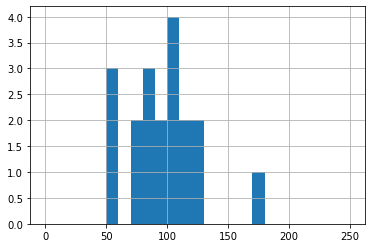

In [49]:
bin_range = np.arange(0, 260, 10)
dfresult['desc_clean_porterstem'].str.len().hist(bins=bin_range)
plt.show()
 

### 3. Data Analisis

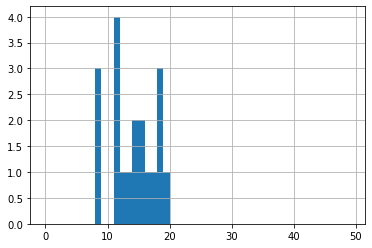

In [50]:
bin_range = np.arange(0, 50)
dfresult['desc_clean_porterstem'].str.split().map(lambda x: len(x)).hist(bins=bin_range)
plt.show()

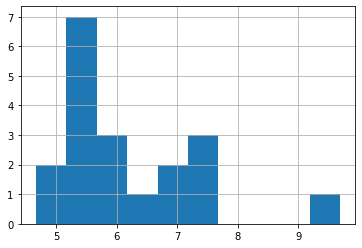

In [51]:
dfresult['desc_clean_porterstem'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
plt.show()

In [52]:
dfresult['desc_clean_porterstem'] = dfresult['desc_clean_porterstem'].apply(lambda x: word_tokenize(str(x)))

In [53]:
tweets = [word for tweet in dfresult['Tweets'] for word in tweet]
fqdist = FreqDist(tweets)

print(fqdist)

<FreqDist with 79 samples and 2627 outcomes>


In [54]:
most_common_word = fqdist.most_common(20)

print(most_common_word)

[(' ', 303), ('a', 263), ('i', 152), ('e', 147), ('n', 145), ('d', 96), ('s', 89), ('u', 84), ('t', 83), ('r', 82), ('o', 76), ('m', 63), ('k', 59), ('2', 55), ('g', 51), ('T', 44), ('h', 43), ('l', 43), ('b', 38), ('0', 38)]


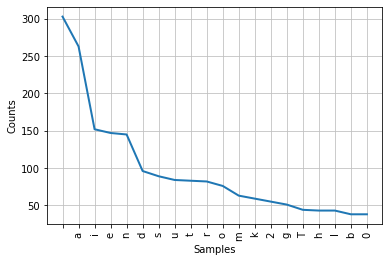

In [55]:
fqdist.plot(20,cumulative=False)

plt.show()

In [56]:
result1 = pd.Series(nltk.ngrams(tweets, 2)).value_counts()[:20]

In [57]:
print (result1)

(a, n)    54
(a,  )    44
(n,  )    36
(2, 0)    33
(d, i)    30
(e, s)    30
( , d)    29
(e, r)    27
(i,  )    26
(s, i)    25
(d, a)    25
( , @)    25
(e, n)    24
(n, g)    24
(G, 2)    23
(a, s)    21
(a, d)    20
(k, a)    20
(b, a)    20
(a, r)    19
dtype: int64


In [60]:
df_baru.to_csv('datagabungan2.csv')

In [59]:
import gensim
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from numpy import array
import numpy as np
import tqdm

In [61]:
df_data2 = pd.read_csv("datagabungan2.csv")

df_data2

,Unnamed: 0,Tahun,Tanggal,Lokasi,Pemimpin tuan rumah,Tweets,desc_clean_porterstem
0,0,2008,14–15 November 2008,"Washington, D.C.",George W. Bush,@BradHarizz @EdoedPohan @aniesbaswedan @ganjar...,bradharizz edoedpohan aniesbaswedan ganjarpran...
1,1,2009,2 April 2009,London,Gordon Brown,RT @YulieNew: Diundangnya pak Anies di acara E...,rt yulienew diundangnya ani acara event g bukt...
2,2,2009,24–25 September 2009,Pittsburgh,Barack Obama,RT @BosPurwa: Klo masih gak paham apa yg diomo...,rt bospurwa klo gak paham yg diomongin ani loe...
3,3,2010,26–27 Juni 2010,Toronto,Stephen Harper,RT @BosPurwa: Klo masih gak paham apa yg diomo...,rt bospurwa klo gak paham yg diomongin ani loe...
4,4,2010,11–12 November 2010,Seoul,Lee Myung-bak,@TanMala06960320 @aniesbaswedan @USAmbIndonesi...,tanmala aniesbaswedan usambindonesia usembassy...
5,5,2011,3–4 November 2011[10],Cannes[11],Nicolas Sarkozy,RT @Save_Moslem: Anies Diundang Jadi Pembicara...,rt save moslem ani diundang pembicara forum g ...
6,6,2012,18–19 Juni 2012[13],Los Cabos\n,Felipe Calderón,RT @Muhammad_Saewad: Ganjar Tidak Diundang di ...,rt muhammad saewad ganjar diundang g http tcoj...
7,7,2013,5–6 September 2013[15],Saint Petersburg,Vladimir Putin,RT @Muhammad_Saewad: Ganjar Tidak Diundang di ...,rt muhammad saewad ganjar diundang g http tcoj...
8,8,2014,15–16 November 2014,Brisbane,Tony Abbott,Pemerintah pastikan semua sektor keamanan KTT ...,pemerintah pastikan sektor keamanan ktt g maks...
9,9,2015,15–16 November 2015,Antalya,Recep Tayyip Erdoğan,Tarian tradisional Bali menyambut para Tamu Ne...,tarian tradision menyambut tamu negara delegas...


In [63]:
df_data3 = [datagabungan2.split() for datagabungan2 in df_data2["desc_clean_porterstem"]]
df_data3

[['bradharizz',
  'edoedpohan',
  'aniesbaswedan',
  'ganjarpranowo',
  'btw',
  'g',
  'dibuka',
  'besok',
  'idolamu',
  'hadir',
  'gak'],
 ['rt',
  'yulienew',
  'diundangnya',
  'ani',
  'acara',
  'event',
  'g',
  'bukti',
  'hasil',
  'kerjanya',
  'diakui',
  'dunia',
  'internasion',
  'http',
  'tcolisimiq'],
 ['rt',
  'bospurwa',
  'klo',
  'gak',
  'paham',
  'yg',
  'diomongin',
  'ani',
  'loe',
  'pade',
  'nangi',
  'dipojokan',
  'dah',
  'ama',
  'gue',
  'execut',
  'interview',
  'from'],
 ['rt',
  'bospurwa',
  'klo',
  'gak',
  'paham',
  'yg',
  'diomongin',
  'ani',
  'loe',
  'pade',
  'nangi',
  'dipojokan',
  'dah',
  'ama',
  'gue',
  'execut',
  'interview',
  'from'],
 ['tanmala',
  'aniesbaswedan',
  'usambindonesia',
  'usembassyjkt',
  'indonesia',
  'g',
  'bahasa',
  'hutan',
  'pendukung',
  'yg',
  'didukung',
  'karakternya',
  'ga',
  'beda'],
 ['rt',
  'save',
  'moslem',
  'ani',
  'diundang',
  'pembicara',
  'forum',
  'g',
  'bangganya',
  

In [66]:
dictionary = corpora.Dictionary(df_data3)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in df_data3]

In [73]:
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(
    random_state=100,
    chunksize=100,
    per_word_topics=True,
    corpus = doc_term_matrix, 
    num_topics=3, 
    id2word = dictionary, 
    passes=50
    )

2022-11-14 01:15:54.807 INFO    gensim.models.ldamodel: using symmetric alpha at 0.3333333333333333
2022-11-14 01:15:54.813 INFO    gensim.models.ldamodel: using symmetric eta at 0.3333333333333333
2022-11-14 01:15:54.813 INFO    gensim.models.ldamodel: using serial LDA version on this node
2022-11-14 01:15:54.815 INFO    gensim.models.ldamodel: running online (multi-pass) LDA training, 3 topics, 50 passes over the supplied corpus of 19 documents, updating model once every 19 documents, evaluating perplexity every 19 documents, iterating 50x with a convergence threshold of 0.001000
2022-11-14 01:15:54.830 INFO    gensim.models.ldamodel: -6.387 per-word bound, 83.7 perplexity estimate based on a held-out corpus of 19 documents with 257 words
2022-11-14 01:15:54.830 INFO    gensim.models.ldamodel: PROGRESS: pass 0, at document #19/19
2022-11-14 01:15:54.838 INFO    gensim.models.ldamodel: topic #0 (0.333): 0.033*"g" + 0.030*"ktt" + 0.030*"http" + 0.019*"presiden" + 0.015*"rt" + 0.015*"la

In [74]:
from pprint import pprint
pprint(ldamodel.print_topics())

2022-11-14 01:15:56.409 INFO    gensim.models.ldamodel: topic #0 (0.333): 0.031*"ktt" + 0.031*"http" + 0.030*"g" + 0.017*"larismi" + 0.017*"menyambut" + 0.017*"minggu" + 0.017*"novemb" + 0.017*"tcoarjwdcjzna" + 0.017*"delegasi" + 0.017*"dewata"
2022-11-14 01:15:56.411 INFO    gensim.models.ldamodel: topic #1 (0.333): 0.044*"g" + 0.029*"aniesbaswedan" + 0.022*"hadir" + 0.017*"ktt" + 0.016*"http" + 0.016*"rt" + 0.016*"indonesia" + 0.016*"gindonesia" + 0.016*"beda" + 0.016*"ganjarpranowo"
2022-11-14 01:15:56.412 INFO    gensim.models.ldamodel: topic #2 (0.333): 0.044*"g" + 0.039*"rt" + 0.034*"http" + 0.029*"ani" + 0.029*"presiden" + 0.018*"diundang" + 0.017*"ktt" + 0.013*"amerika" + 0.013*"serikat" + 0.013*"gak"


[(0,
  '0.031*"ktt" + 0.031*"http" + 0.030*"g" + 0.017*"larismi" + '
  '0.017*"menyambut" + 0.017*"minggu" + 0.017*"novemb" + 0.017*"tcoarjwdcjzna" '
  '+ 0.017*"delegasi" + 0.017*"dewata"'),
 (1,
  '0.044*"g" + 0.029*"aniesbaswedan" + 0.022*"hadir" + 0.017*"ktt" + '
  '0.016*"http" + 0.016*"rt" + 0.016*"indonesia" + 0.016*"gindonesia" + '
  '0.016*"beda" + 0.016*"ganjarpranowo"'),
 (2,
  '0.044*"g" + 0.039*"rt" + 0.034*"http" + 0.029*"ani" + 0.029*"presiden" + '
  '0.018*"diundang" + 0.017*"ktt" + 0.013*"amerika" + 0.013*"serikat" + '
  '0.013*"gak"')]


In [75]:
pip install pyLDAvis

In [76]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [77]:
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(ldamodel, doc_term_matrix, dictionary)
LDAvis_prepared
#pyLDAvis.display(vis)

C:\Users\man0l\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.092812 -0.025049       1        1  50.745118
1      0.090368 -0.027138       2        1  37.533960
0      0.002444  0.052186       3        1  11.720923, topic_info=              Term      Freq     Total Category  logprob  loglift
69             ktt  4.000000  4.000000  Default  30.0000  30.0000
59        presiden  4.000000  4.000000  Default  29.0000  29.0000
19            http  6.000000  6.000000  Default  28.0000  28.0000
110        larismi  2.000000  2.000000  Default  27.0000  27.0000
81       menyambut  1.000000  1.000000  Default  26.0000  26.0000
..             ...       ...       ...      ...      ...      ...
55        diundang  0.130576  3.356576   Topic3  -5.4411  -1.1029
103        amerika  0.130545  2.647893   Topic3  -5.4413  -0.8660
106        serikat  0.130545  2.647893   Topic3  -5.4413  -0.8660
45       indonesia  0.130506  2.586196   Topic3  -5.4416  -0.8427
0    aniesbaswedan  0.130505  3.881260   Topic3  -5.4416  -1.2487

[149 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
144       1  0.774622         air
131       2  0.812688          al
25        1  1.000196         ama
102       2  0.812717  ambassador
103       1  0.755318     amerika
...     ...       ...         ...
130       2  0.812711          ya
39        1  0.755329          yg
39        2  0.377664          yg
108       2  0.812717          yo
143       2  0.812688         zay

[127 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

In [72]:
import streamlit as st 

C:\Users\man0l\anaconda3\lib\site-packages\streamlit\proto\Common_pb2.py:17: DeprecationWarning: Call to deprecated create function FileDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  DESCRIPTOR = _descriptor.FileDescriptor(
C:\Users\man0l\anaconda3\lib\site-packages\streamlit\proto\Common_pb2.py:35: DeprecationWarning: Call to deprecated create function FieldDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  _descriptor.FieldDescriptor(
C:\Users\man0l\anaconda3\lib\site-packages\streamlit\proto\Common_pb2.py:28: DeprecationWarning: Call to deprecated create function Descriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  _STRINGARRAY = _descriptor.Descriptor(
C:\Users\man0l\anaconda3\li

# REPORTING

### 1. **Analisis**

Dari hasil pencarian di twitter dan wikipedia, berdasarkan grafik pyLDA didapatkan kata yang paling banyak adalah presiden, ani,
anies baswedan, dan hadir.

Kemungkinan topik yang relevan presiden yang hadir dalam KTT G20.

Adapun analisis ini terdapat keanehan seperti :

1. Dalam proses cleaning data masih terdapat kata-kata yang tidak diperlukan (Contoh:rt,https, tanda baca ", tanda baca ,)
2. Dalam grafil LDA kata yang paling banyak muncul adalah ani, mungkin kata ani ini merujuk pada Anies Baswedan
3. Proses cleaning data masih belum sempurna karena masih banyak kata-kata yang mirip namun dianggap kata berbeda sehingga membuat pemahaman yang berbeda

### 2. **Kesimpulan**

Dari proses analisis ini masih terdapat kekurangan terutama dalam proses cleaning data yang belum maksimal. Hal tersebut dibuktikan pada kata-kata yang kurang relevan yang muncul pada grafik LDA.